# **OUTLIERS**


---

### 🚨 OUTLIERS ALERT! 🚨

Outliers are those **unusual data points** that  
**stand far apart** from the rest of your dataset! 📊

🔹 They are **extreme values** — either **way too high** or **shockingly low** compared to others.  
🔹 Outliers can **mislead your analysis**, **skew results**, or even **hide real trends**!

📌 **Remember:**  
> "An outlier doesn't follow the crowd — it makes its own story!"

---

In [1]:
# LOADING DATASET:
import pandas as pd
DATA=pd.read_csv(r"C:\Users\Nagesh Agrawal\OneDrive\Desktop\EDA\DATA\DUPLICATES_REMOVED_DATA.csv")

# **DETECTION OF OUTLIERS FROM VISUALISATION**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
DATA

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,1
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,1
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,1
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,missing,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,1
...,...,...,...,...,...,...,...,...,...
3348707,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,1
3348708,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,1
3348709,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,missing,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753,1
3348710,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,missing,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,1


## BOX PLOT

In [4]:
# sns.boxplot(data=DATA, x='category_id')

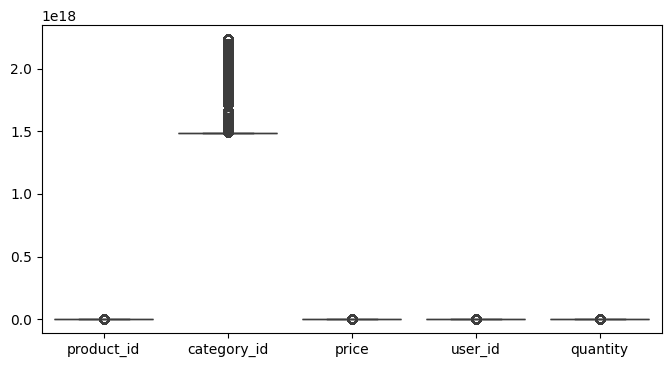

In [5]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=DATA)  
plt.show()


## HISTOGRAM

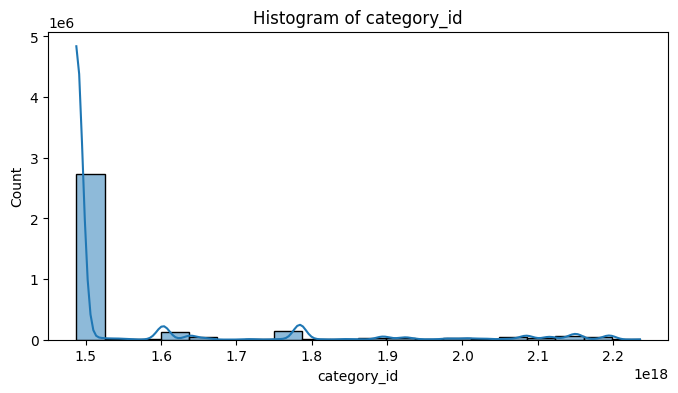

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(DATA['category_id'], bins=20, kde=True)  # Replace 'column_name'
plt.title('Histogram of category_id')
plt.show()

## SCATTER PLOT 

In [7]:
"""plt.figure(figsize=(8, 5))
sns.scatterplot(data=DATA)  # Replace both
plt.title('Scatterplot of column_x vs column_y')
plt.show()"""

"plt.figure(figsize=(8, 5))\nsns.scatterplot(data=DATA)  # Replace both\nplt.title('Scatterplot of column_x vs column_y')\nplt.show()"

# **STATISTICAL METHODS**

#### Z-SCORE CALCULATION:

In [8]:

def z_score_calculator(DATA):
    from scipy.stats import zscore
    for col in DATA.select_dtypes("number").columns:
        Z_SCORE = zscore(DATA[col])
        print(f"{col} z_score : {Z_SCORE}")
        
    

In [9]:


def z_score_calculator(df):
    from scipy.stats import zscore
    import pandas as pd
    numeric_cols = df.select_dtypes(include='number')
    z_scores = numeric_cols.apply(zscore)

    # Find rows where any column has a Z-score > 3 or < -3
    outlier_rows = (z_scores.abs() > 3).any(axis=1)

    # Extract those rows
    outliers = df[outlier_rows]
    return outliers



In [10]:
z_score_calculator(DATA)

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1
9,2019-12-01 00:00:34 UTC,cart,5335,1487580009605365797,runail,0.40,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1
17,2019-12-01 00:00:50 UTC,view,3936,1487580005343953762,entity,10.95,579969717,006dd2fb-ae1e-4461-985a-d4e70ca64543,1
36,2019-12-01 00:01:52 UTC,cart,5700046,1487580009286598681,runail,0.40,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2
39,2019-12-01 00:02:16 UTC,view,5899850,2115334439910245200,missing,4.46,538507783,177b9f5a-9ef3-4e11-b31e-6efd86a9bff2,1
...,...,...,...,...,...,...,...,...,...
3348697,2019-12-31 23:58:04 UTC,view,5529515,2151191070908613477,missing,1.00,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1
3348703,2019-12-31 23:58:50 UTC,view,5528911,2151191070908613477,missing,3.97,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1
3348706,2019-12-31 23:59:37 UTC,view,5834173,2151191070908613477,runail,2.62,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1
3348708,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,1


#### UPPER/LOWER EXTREME CALCULATION:

In [11]:
import pandas as pd

def DATA_EXTREMES(DATA):
    extremes = []
    for col in DATA.select_dtypes('number').columns:
        Q3 = DATA[col].quantile(0.75)
        Q1 = DATA[col].quantile(0.25)
        IQR = Q3 - Q1
        upper_extreme = Q3 + 1.5 * IQR
        lower_extreme = Q1 - 1.5 * IQR
        extremes.append({
            'Column': col,
            'Upper_Extreme': upper_extreme,
            'Lower_Extreme': lower_extreme
        })
    return pd.DataFrame(extremes)


In [12]:
EXTREME_VALUES=pd.DataFrame(DATA_EXTREMES(DATA))
EXTREME_VALUES

,Column,Upper_Extreme,Lower_Extreme
0,product_id,6.059438e+06,5.526230e+06
1,category_id,1.487580e+18,1.487580e+18
2,price,1.476000e+01,-5.560000e+00
3,user_id,7.263984e+08,3.441720e+08
4,quantity,1.000000e+00,1.000000e+00


In [13]:
DATA[DATA["category_id"]>1.4875800245035325e+18]

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity
15,2019-12-01 00:00:46 UTC,view,5798929,1783999068909863670,zinger,6.19,579966747,1512be50-d0fd-4a92-bcd8-3ea3943f2a3b,1
39,2019-12-01 00:02:16 UTC,view,5899850,2115334439910245200,missing,4.46,538507783,177b9f5a-9ef3-4e11-b31e-6efd86a9bff2,1
40,2019-12-01 00:02:18 UTC,remove_from_cart,5772301,1602943681873052386,grattol,4.76,492321842,d1d89629-a5f8-4aab-b42e-e8c30756396f,1
41,2019-12-01 00:02:19 UTC,remove_from_cart,5772301,1602943681873052386,grattol,4.76,492321842,d1d89629-a5f8-4aab-b42e-e8c30756396f,1
42,2019-12-01 00:02:25 UTC,view,5772301,1602943681873052386,grattol,4.76,492321842,d1d89629-a5f8-4aab-b42e-e8c30756396f,1
...,...,...,...,...,...,...,...,...,...
3348697,2019-12-31 23:58:04 UTC,view,5529515,2151191070908613477,missing,1.00,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1
3348698,2019-12-31 23:58:13 UTC,view,5869134,1783999064136745198,cosmoprofi,6.35,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,1
3348703,2019-12-31 23:58:50 UTC,view,5528911,2151191070908613477,missing,3.97,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1
3348706,2019-12-31 23:59:37 UTC,view,5834173,2151191070908613477,runail,2.62,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1


In [14]:
DATA[DATA["category_id"]<875799953782886e+18]

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,1
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,1
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,1
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,missing,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,1
...,...,...,...,...,...,...,...,...,...
3348707,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,1
3348708,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,1
3348709,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,missing,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753,1
3348710,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,missing,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,1


In [15]:
# lower extreme: product_id
DATA[DATA["product_id"] < 5526230.0] # LESS THAN LOWER EXTREME VALUE {5526230.0}

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1
9,2019-12-01 00:00:34 UTC,cart,5335,1487580009605365797,runail,0.40,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1
17,2019-12-01 00:00:50 UTC,view,3936,1487580005343953762,entity,10.95,579969717,006dd2fb-ae1e-4461-985a-d4e70ca64543,1
52,2019-12-01 00:02:46 UTC,view,72433,1487580011996119176,skinlite,4.75,537197314,cf789c07-983d-4a56-a093-fa21b22453e0,1
83,2019-12-01 00:03:47 UTC,view,72433,1487580011996119176,skinlite,4.75,537197314,5ffe1721-5efc-498f-817a-1678b27888e8,1
...,...,...,...,...,...,...,...,...,...
3348569,2019-12-31 23:45:42 UTC,view,44151,1487580006317032337,missing,9.52,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,1
3348646,2019-12-31 23:54:06 UTC,view,44140,1487580013615120588,missing,0.71,567323227,2dc166c7-ba42-4df8-9733-65c7a2e90f9e,1
3348652,2019-12-31 23:54:44 UTC,view,5304,1487580009471148064,runail,0.32,584900297,191a4251-e99c-4dc9-87ee-295107387d58,1
3348682,2019-12-31 23:57:15 UTC,purchase,5463,1487580009387261981,ingarden,4.92,231690364,63fc9878-efe2-41e3-92b1-9b2deb943bbb,1


In [16]:
DATA[DATA["product_id"] > 6059438.0] # GREATER THAN UPPER EXTREME VALUE[6059438.0].

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity


In [17]:
# DISPLAY OUTLIER IN EACH COLUMN :
outliers = DATA[(DATA["product_id"] < 5526230.0) | (DATA["product_id"] > 6059438.0 )]
outliers

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1
9,2019-12-01 00:00:34 UTC,cart,5335,1487580009605365797,runail,0.40,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1
17,2019-12-01 00:00:50 UTC,view,3936,1487580005343953762,entity,10.95,579969717,006dd2fb-ae1e-4461-985a-d4e70ca64543,1
52,2019-12-01 00:02:46 UTC,view,72433,1487580011996119176,skinlite,4.75,537197314,cf789c07-983d-4a56-a093-fa21b22453e0,1
83,2019-12-01 00:03:47 UTC,view,72433,1487580011996119176,skinlite,4.75,537197314,5ffe1721-5efc-498f-817a-1678b27888e8,1
...,...,...,...,...,...,...,...,...,...
3348569,2019-12-31 23:45:42 UTC,view,44151,1487580006317032337,missing,9.52,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,1
3348646,2019-12-31 23:54:06 UTC,view,44140,1487580013615120588,missing,0.71,567323227,2dc166c7-ba42-4df8-9733-65c7a2e90f9e,1
3348652,2019-12-31 23:54:44 UTC,view,5304,1487580009471148064,runail,0.32,584900297,191a4251-e99c-4dc9-87ee-295107387d58,1
3348682,2019-12-31 23:57:15 UTC,purchase,5463,1487580009387261981,ingarden,4.92,231690364,63fc9878-efe2-41e3-92b1-9b2deb943bbb,1


# **MACHINE LEARNING ALGORITHMS**

### ISOLATION FOREST:


---

🎯 **ISOLATION FOREST: Outlier Detection Made Simple!**

🌲 **Isolation**  
→ Builds **many random trees** that **split data** in different directions.  
→ Each tree tries to **"isolate"** a data point by cutting through the data space.

🧮 **Scoring**  
→ Measures **how quickly** a data point gets isolated.  
→ **Point that isolates quickly = likely an anomaly!**

🚨 **Result**  
→ Points with **shorter isolation paths** are flagged as **anomalies or outliers**.  

📊 **Works on Multidimensional Data!**  
→ Detects **outliers** in complex datasets with **multiple features**.

❗ **Anomaly = A data point that behaves *differently***  
→ It's the **odd one out** among the rest!

🔍 **Unsupervised Technique**  
→ No labels needed!  
→ **Not used** for building predictive models — it’s purely for **detection**.

---




---

🎯 **WORKING OF ISOLATION FOREST**

🌲 **Step 1: Build Random Trees**  
👉 Randomly pick a feature  
👉 Randomly select a split value  
👉 Repeat to create **many isolation trees**

🔪 **Step 2: Isolate the Points**  
👉 Each tree **splits the data**  
👉 A data point gets **isolated** as we go down the tree

⏱️ **Step 3: Measure Path Length**  
👉 Count steps from root to isolated point  
👉 **Points that isolate quickly = potential outliers**

📊 **Step 4: Calculate Anomaly Score**  
👉 Shorter average path → **Higher anomaly score**  
👉 Score close to **1 = anomaly**  
👉 Score close to **0 = normal**

🚨 **Final Step: Flag Anomalies**  
👉 Use the score to **identify unusual data**

🧠 **Unsupervised & Powerful**  
💡 No need for labeled data!

---


In [18]:
from sklearn.ensemble import IsolationForest
ISO=IsolationForest(contamination=0.1,random_state=2)
DATA["ANOMALY_SCORE"]=ISO.fit_predict(DATA.select_dtypes("number"))

In [19]:
DATA # ON ANOMALY SCORE WHAT WE CAN SAY WHICH EVER DATA POINT ACT AS ANOMALY WILL HAVE ANOMALY SCORE AS -1....

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity,ANOMALY_SCORE
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,1,1
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,1,1
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1,-1
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,1,1
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,missing,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,1,1
...,...,...,...,...,...,...,...,...,...,...
3348707,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,1,1
3348708,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,1,-1
3348709,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,missing,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753,1,-1
3348710,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,missing,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,1,1


In [20]:
# OUTLIERS :
DATA[DATA["ANOMALY_SCORE"]==-1]

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity,ANOMALY_SCORE
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1,-1
9,2019-12-01 00:00:34 UTC,cart,5335,1487580009605365797,runail,0.40,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1,-1
17,2019-12-01 00:00:50 UTC,view,3936,1487580005343953762,entity,10.95,579969717,006dd2fb-ae1e-4461-985a-d4e70ca64543,1,-1
46,2019-12-01 00:02:36 UTC,view,5590822,1487580006300255120,strong,194.44,509449396,35baf72e-d65a-422b-8d46-d62a52985877,1,-1
51,2019-12-01 00:02:42 UTC,view,5746846,2193074740686488401,irisk,52.70,579970581,0b92a801-25d8-4da5-b514-fda26db3faae,1,-1
...,...,...,...,...,...,...,...,...,...,...
3348690,2019-12-31 23:57:32 UTC,view,5528911,2151191070908613477,missing,3.97,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1,-1
3348697,2019-12-31 23:58:04 UTC,view,5529515,2151191070908613477,missing,1.00,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1,-1
3348703,2019-12-31 23:58:50 UTC,view,5528911,2151191070908613477,missing,3.97,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1,-1
3348708,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,1,-1


## DBSCAN [ DENSITY BASED SPATIAL CLUSTERING OF APPLICATION WITH NOISE ]

---

### 🌟 **DBSCAN: Outlier Detection Made Simple!** 🌟

DBSCAN is **effective** for finding outliers in **spatial data** or data that form **clusters**. Points that **do not belong to any cluster** are **considered as outliers**—it’s like identifying the lone wolves in a herd! 🐺💥

---


In [21]:
! pip install hdbscan


You should consider upgrading via the 'C:\Users\Nagesh Agrawal\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [22]:
! pip install hdbscan

You should consider upgrading via the 'C:\Users\Nagesh Agrawal\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [23]:
import hdbscan
from sklearn.preprocessing import StandardScaler

sampled_data = DATA.sample(n=10000, random_state=42)

numeric_cols = sampled_data.select_dtypes(include=["float64", "int64"])
standardized_data = StandardScaler().fit_transform(numeric_cols)

clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
sampled_data["db_scaned"] = clusterer.fit_predict(standardized_data)


In [24]:
sampled_data

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity,ANOMALY_SCORE,db_scaned
307091,2019-12-03 12:35:54 UTC,view,5710115,1487580012994363565,italwax,20.14,557685968,764da041-68fc-48e5-b649-ffa56ebd68bd,1,1,-1
2769365,2019-12-24 09:43:55 UTC,cart,5752494,1487580005511725929,missing,4.27,437208817,e3c3a5e9-609d-4e52-82e6-aa317dfd6800,1,1,-1
1906790,2019-12-16 12:07:59 UTC,view,5873513,1487580013279576251,missing,31.59,587773138,a5a82931-0e03-40c7-80e1-bc060770cf03,1,1,-1
541134,2019-12-05 09:34:16 UTC,view,5854491,1487580005268456287,missing,8.65,571007640,c3203d51-85a6-4a8f-9a52-f5b60912dac7,1,1,-1
800760,2019-12-07 15:22:24 UTC,view,5809910,1602943681873052386,grattol,5.24,472536297,d1cda616-04eb-4b24-b9a5-b55ea09c24e3,1,1,24
...,...,...,...,...,...,...,...,...,...,...,...
1679194,2019-12-14 13:43:08 UTC,view,5686080,1487580008145748965,missing,0.51,586823046,4d5eadd0-ecd1-48c8-9cdc-b7835a670400,1,1,56
141995,2019-12-02 08:02:28 UTC,view,5823778,1487580013749338323,estel,2.38,580710329,92b61549-476b-4dee-981f-6a5e0d7acfa7,1,1,56
2942393,2019-12-25 21:54:44 UTC,cart,5753480,1487580013069861041,italwax,2.68,568557356,57fbcb30-c41e-475d-a8ba-c876ca950b37,1,1,56
1257201,2019-12-11 04:35:11 UTC,cart,5813416,1897124478404526487,missing,5.56,585107125,80581cbe-71d1-4717-8c4d-138f9fe95db1,1,1,16



---

### 🚫 **Why NOT DBSCAN/HDBSCAN on Big Data?**

> 🧠 **DBSCAN & HDBSCAN = Smart but Heavy!**

* 🐢 **Slow** — Complexity is **O(n²)**, so they **choke on millions of rows**
* 🧊 **Memory-Hungry** — They build **distance matrices** → RAM explodes!
* 🧭 **No Free Lunch** — Accuracy is great, but **doesn't scale well**
* ⚠️ **Not Parallel by Default** — CPU-only, and doesn't batch easily

✅ **Great for small to mid-sized data**, but **switch to Isolation Forest, MiniBatchKMeans**, or **GPU-based clustering** for big data!

---



### 🔵 **Elliptic Envelope**
✨ *Outlier Detection with an Elliptical Boundary!* ✨

📌 **What it is:**
A method to detect **outliers** assuming the data follows a **Gaussian (normal) distribution**.

🔷 **How it works:**
It fits an **ellipse** around the **central data points** and flags anything **outside** the ellipse as an **outlier**.

📊 **Best for:**

* **Multivariate normal data**
* When you want a **geometric view** of inliers vs outliers

⚙️ **Behind the scenes:**
Uses **Mahalanobis distance** to decide how far a point is from the center of the ellipse.

💡 **Use it in Python:**



✅ **+ Simple**
✅ **+ Fast**
❌ **- Not for non-Gaussian data**

Would you like a diagram to visualize the ellipse and outliers?


In [25]:
from sklearn.covariance import EllipticEnvelope
EE=EllipticEnvelope(contamination=0.1)
sampled_data["ELLIPTIC_ENVOLOPE"]=EE.fit_predict(sampled_data.select_dtypes("number"))
# -1 = outlier, 1 = inlier



c:\Users\Nagesh Agrawal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (105.775527138558246 > 105.631902882317576). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
c:\Users\Nagesh Agrawal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (105.775527138558246 > 105.631902882317576). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
c:\Users\Nagesh Agrawal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (105.775527138558246 > 105.631902882

In [26]:
sampled_data

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity,ANOMALY_SCORE,db_scaned,ELLIPTIC_ENVOLOPE
307091,2019-12-03 12:35:54 UTC,view,5710115,1487580012994363565,italwax,20.14,557685968,764da041-68fc-48e5-b649-ffa56ebd68bd,1,1,-1,1
2769365,2019-12-24 09:43:55 UTC,cart,5752494,1487580005511725929,missing,4.27,437208817,e3c3a5e9-609d-4e52-82e6-aa317dfd6800,1,1,-1,1
1906790,2019-12-16 12:07:59 UTC,view,5873513,1487580013279576251,missing,31.59,587773138,a5a82931-0e03-40c7-80e1-bc060770cf03,1,1,-1,1
541134,2019-12-05 09:34:16 UTC,view,5854491,1487580005268456287,missing,8.65,571007640,c3203d51-85a6-4a8f-9a52-f5b60912dac7,1,1,-1,1
800760,2019-12-07 15:22:24 UTC,view,5809910,1602943681873052386,grattol,5.24,472536297,d1cda616-04eb-4b24-b9a5-b55ea09c24e3,1,1,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1679194,2019-12-14 13:43:08 UTC,view,5686080,1487580008145748965,missing,0.51,586823046,4d5eadd0-ecd1-48c8-9cdc-b7835a670400,1,1,56,1
141995,2019-12-02 08:02:28 UTC,view,5823778,1487580013749338323,estel,2.38,580710329,92b61549-476b-4dee-981f-6a5e0d7acfa7,1,1,56,1
2942393,2019-12-25 21:54:44 UTC,cart,5753480,1487580013069861041,italwax,2.68,568557356,57fbcb30-c41e-475d-a8ba-c876ca950b37,1,1,56,1
1257201,2019-12-11 04:35:11 UTC,cart,5813416,1897124478404526487,missing,5.56,585107125,80581cbe-71d1-4717-8c4d-138f9fe95db1,1,1,16,-1


## AUTOENCODER


---

🎯 **Autoencoder for Anomaly Detection** 🚨

🔍 **Autoencoders** use **neural networks** to **reconstruct input data**.

📉 **Data points with high reconstruction error** = **Anomalies / Outliers**!

🧠 Perfect for detecting irregularities in **complex or high-dimensional datasets**.

✨ *Let the neural net learn what's "normal"... so it can spot what's not!* ✨

---



In [27]:
#! pip install tensorflow

In [28]:
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sampled_data.select_dtypes("number"))

# Build autoencoder
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation="relu")(input_layer)
decoded = Dense(input_dim, activation="linear")(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, verbose=0)

# Reconstruction error
reconstructions = autoencoder.predict(X_scaled)
mse = np.mean(np.square(X_scaled - reconstructions), axis=1)

# Flag outliers
threshold = np.percentile(mse, 95)
outliers = (mse > threshold).astype(int)  # 1 = outlier
outliers


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


array([0, 0, 0, ..., 0, 0, 0])

| **Method**            | **Best When...**                                                                 | **Strengths**                                                                 | **Limitations**                                                        | **Suitable for Your Case?**             |
|-----------------------|----------------------------------------------------------------------------------|-------------------------------------------------------------------------------|------------------------------------------------------------------------|-----------------------------------------|
| **Z-Score**           | Data is **normally distributed**                                                | ✅ Easy to implement<br>✅ Fast for large data                                 | ❌ Assumes normality<br>❌ Sensitive to extreme values                  | ⚠️ Only if your data is normal          |
| **IQR Method**        | Data is **not normal or skewed**                                                | ✅ Fast and interpretable<br>✅ No distribution assumption                     | ❌ Treats each column independently (univariate only)                  | ✅ Good for initial univariate check     |
| **Isolation Forest**  | Large datasets with **non-linear, multivariate outliers**                       | ✅ Works on large data<br>✅ Detects multivariate outliers                    | ❌ Less interpretable<br>⚠️ Needs tuning (contamination rate)         | ✅ Best choice for your large dataset   |
| **DBSCAN**            | Data has **dense clusters + noise**, and you're looking for **spatial outliers** | ✅ Detects arbitrary shapes<br>✅ No need to specify number of clusters        | ❌ Slow for large data<br>❌ Needs parameter tuning (eps, min_samples) | ⚠️ Use only if data is spatially clustered |
| **Autoencoder**       | Data is **high-dimensional, non-tabular** (e.g., time-series, images)            | ✅ Powerful for complex, non-linear outliers                                  | ❌ Requires deep learning setup<br>❌ Hard to interpret                 | ❌ Not suitable for tabular numeric data |

---

# 🌟 **OUTLIER TREATMENT**



---

### 🚫 1. **REMOVAL**

🧹 **Delete** the outlier rows

📌 When? Obvious mistakes or irrelevant data

✅ **Clean & simple!**

> ❗ **But what if genuine outliers are many?**

* ❌ **Avoid blind removal** — you might lose key patterns

* ✅ Try alternatives:

  * 🔄 **Log Transformation**

  * 🌳 **Robust models** like Decision Trees, XGBoost

  * ✂️ **Model them separately** if they represent a distinct group
  
    💡 *If genuine outliers are frequent, they’re not really outliers — they’re part of the data!*

---

### 🎯 2. **CAPPING (WINSORIZATION)**

📏 **Limit** extreme values to a set range

💡 Use 5th & 95th percentiles

✅ **Keeps data, reduces impact!**

⚠️ **Changes actual values** — may distort real insights

🤔 Use only if the outliers are **not critical** for pattern detection

---

### 🔄 3. **TRANSFORMATION**

🔧 **Shrink** the effect of outliers

📊 Use **Log**, **√**, or **Z-score**

✅ **Smooth and normalize!**

🎯 Best for **skewed data**

⚠️ Log works only for **positive values**

---

### 🧩 4. **IMPUTATION**

🔁 **Replace** outliers with:

👉 **Mean**, **Median**, or **Mode**

✅ **Balanced and stable!**

🚫 **Not ideal for outliers** — may **distort distributions**

⚠️ Can even **create duplicate records**

✔️ Better suited for **missing values**, not extreme ones

---

### ✨ **Tip**: Always visualize first with a boxplot or scatter plot before treating!

📈 Let your data shine—**without the drama!** 💥

---



<Axes: >

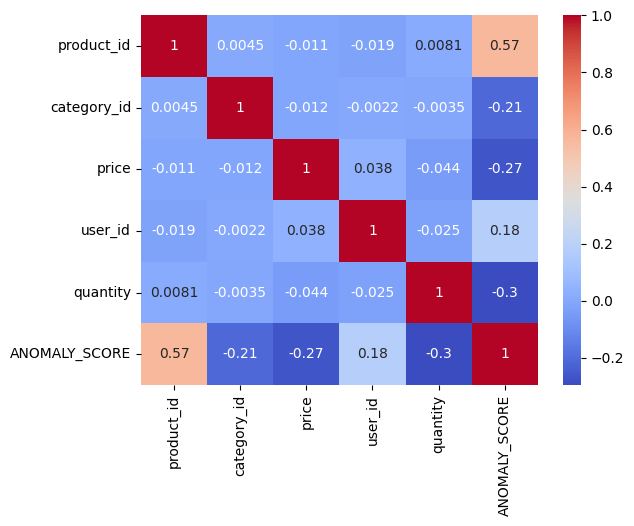

In [29]:
import seaborn as sns
# Plot heatmap with annotation
sns.heatmap(DATA.select_dtypes("number").corr(), annot=True, cmap='coolwarm')

**REMOVAL OF OUTLIERS**

In [30]:
DATA # ALONG WITH ANOMALY SCORE FROM ISOLATION FOREST ALGO:

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity,ANOMALY_SCORE
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,1,1
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,1,1
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1,-1
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,1,1
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,missing,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,1,1
...,...,...,...,...,...,...,...,...,...,...
3348707,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,1,1
3348708,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,1,-1
3348709,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,missing,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753,1,-1
3348710,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,missing,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,1,1


In [31]:
EXTREME_VALUES # EXTREME VALUE CALCULATED FOR EACH NUMERICAL DATA..

,Column,Upper_Extreme,Lower_Extreme
0,product_id,6.059438e+06,5.526230e+06
1,category_id,1.487580e+18,1.487580e+18
2,price,1.476000e+01,-5.560000e+00
3,user_id,7.263984e+08,3.441720e+08
4,quantity,1.000000e+00,1.000000e+00


In [32]:
OUTLIER_FREE_DATA=DATA[DATA["ANOMALY_SCORE"]==1]
OUTLIER_FREE_DATA   # here outliers reduces...

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity,ANOMALY_SCORE
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,1,1
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,1,1
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,1,1
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,missing,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,1,1
5,2019-12-01 00:00:09 UTC,view,5773361,1487580005134238553,runail,2.62,560109803,38cf4ba1-4a0a-4c9e-b870-46685d105f95,1,1
...,...,...,...,...,...,...,...,...,...,...
3348705,2019-12-31 23:59:35 UTC,view,5784043,1487580005754995573,missing,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,1,1
3348706,2019-12-31 23:59:37 UTC,view,5834173,2151191070908613477,runail,2.62,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1,1
3348707,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,1,1
3348710,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,missing,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,1,1


In [ ]:
#OUTLIER_FREE_DATA.to_csv(r"DATA\OUTLIER_FREE_DATA.csv",index=False)

In [34]:
DATA[DATA["category_id"] > 1.4875800245035325e+18]

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity,ANOMALY_SCORE
15,2019-12-01 00:00:46 UTC,view,5798929,1783999068909863670,zinger,6.19,579966747,1512be50-d0fd-4a92-bcd8-3ea3943f2a3b,1,1
39,2019-12-01 00:02:16 UTC,view,5899850,2115334439910245200,missing,4.46,538507783,177b9f5a-9ef3-4e11-b31e-6efd86a9bff2,1,1
40,2019-12-01 00:02:18 UTC,remove_from_cart,5772301,1602943681873052386,grattol,4.76,492321842,d1d89629-a5f8-4aab-b42e-e8c30756396f,1,1
41,2019-12-01 00:02:19 UTC,remove_from_cart,5772301,1602943681873052386,grattol,4.76,492321842,d1d89629-a5f8-4aab-b42e-e8c30756396f,1,1
42,2019-12-01 00:02:25 UTC,view,5772301,1602943681873052386,grattol,4.76,492321842,d1d89629-a5f8-4aab-b42e-e8c30756396f,1,1
...,...,...,...,...,...,...,...,...,...,...
3348697,2019-12-31 23:58:04 UTC,view,5529515,2151191070908613477,missing,1.00,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1,-1
3348698,2019-12-31 23:58:13 UTC,view,5869134,1783999064136745198,cosmoprofi,6.35,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,1,1
3348703,2019-12-31 23:58:50 UTC,view,5528911,2151191070908613477,missing,3.97,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1,-1
3348706,2019-12-31 23:59:37 UTC,view,5834173,2151191070908613477,runail,2.62,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1,1


In [35]:
outliers = DATA[(DATA["category_id"] < 1.4875799953782886e+18)| (DATA["category_id"] > 1.4875800245035325e+18)]
outliers

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity,ANOMALY_SCORE
15,2019-12-01 00:00:46 UTC,view,5798929,1783999068909863670,zinger,6.19,579966747,1512be50-d0fd-4a92-bcd8-3ea3943f2a3b,1,1
39,2019-12-01 00:02:16 UTC,view,5899850,2115334439910245200,missing,4.46,538507783,177b9f5a-9ef3-4e11-b31e-6efd86a9bff2,1,1
40,2019-12-01 00:02:18 UTC,remove_from_cart,5772301,1602943681873052386,grattol,4.76,492321842,d1d89629-a5f8-4aab-b42e-e8c30756396f,1,1
41,2019-12-01 00:02:19 UTC,remove_from_cart,5772301,1602943681873052386,grattol,4.76,492321842,d1d89629-a5f8-4aab-b42e-e8c30756396f,1,1
42,2019-12-01 00:02:25 UTC,view,5772301,1602943681873052386,grattol,4.76,492321842,d1d89629-a5f8-4aab-b42e-e8c30756396f,1,1
...,...,...,...,...,...,...,...,...,...,...
3348697,2019-12-31 23:58:04 UTC,view,5529515,2151191070908613477,missing,1.00,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1,-1
3348698,2019-12-31 23:58:13 UTC,view,5869134,1783999064136745198,cosmoprofi,6.35,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,1,1
3348703,2019-12-31 23:58:50 UTC,view,5528911,2151191070908613477,missing,3.97,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1,-1
3348706,2019-12-31 23:59:37 UTC,view,5834173,2151191070908613477,runail,2.62,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1,1


In [36]:
outliers_FREE_DATA= DATA[(DATA["category_id"] > 1.4875799953782886e+18)| (DATA["category_id"] < 1.4875800245035325e+18)]
outliers_FREE_DATA

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity,ANOMALY_SCORE
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,1,1
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,1,1
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,1,-1
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,1,1
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,missing,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,1,1
...,...,...,...,...,...,...,...,...,...,...
3348707,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,1,1
3348708,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,1,-1
3348709,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,missing,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753,1,-1
3348710,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,missing,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,1,1



---

### 🎯 **CAPPING (WINSORIZATION)**

✨ *"Don't delete the drama—just tone it down!"* ✨

🔒 **Cap extreme values** to the **maximum or minimum allowed range**

📉 **Ideal when outliers shouldn't be removed**,

but 👉 **their impact must be reduced**

📏 **Trim the extremes** — Keep the essence!

💡 Use percentiles like **5th & 95th** or fixed thresholds.

✅ Safe, smart, and still realistic!

---


In [37]:
DATA_WINSOR=DATA.copy()

In [38]:
# DEFINE PERCENTILE FOR CAPPING:
import numpy as np
LOWER_LIMIT=np.percentile(DATA_WINSOR["category_id"],5)
UPPER_LIMIT=np.percentile(DATA_WINSOR["category_id"],90)
DATA_WINSOR["category_id"]=np.clip(DATA_WINSOR["category_id"],LOWER_LIMIT,UPPER_LIMIT)

<Axes: >

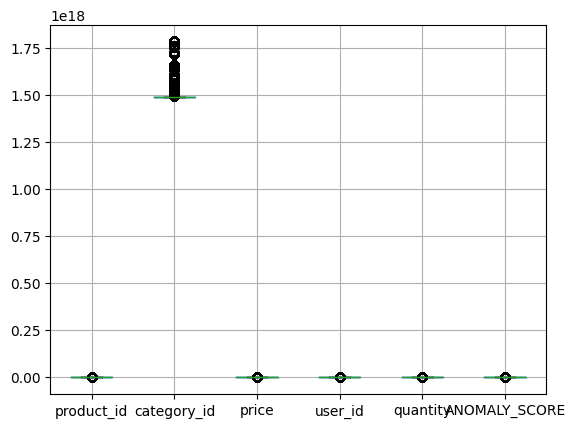

In [39]:
DATA_WINSOR.boxplot()


---
### 🎯 **TRANSFORMATION**
### 🔄 **TRANSFORMATION MAGIC!**

✨ *"Don't erase the extremes — reshape them!"* ✨

Apply transformations to **reduce the influence** of outliers
and make your data **smoother & smarter** 📊

---

### 🧮 **Common Transformations**:

📉 **Log Transformation**

🔹 *"Compresses large values"*

🔹 Great for **skewed data**


🔢 **Box-Cox Transformation**

🔹 *"Turns chaos into normal!"*

🔹 Makes data **more normally distributed**

🔹 Only for **positive values**


🧮 **Square Root Transformation**

🔹 *"Tames the extremes gently"*

🔹 Works well when data has **moderate skew**

---


In [40]:
DATA_FOR_logTRANSFORMATION=DATA.copy()

In [42]:
DATA_FOR_logTRANSFORMATION["category_id"]=np.log1p(DATA_FOR_logTRANSFORMATION["category_id"])

<Axes: >

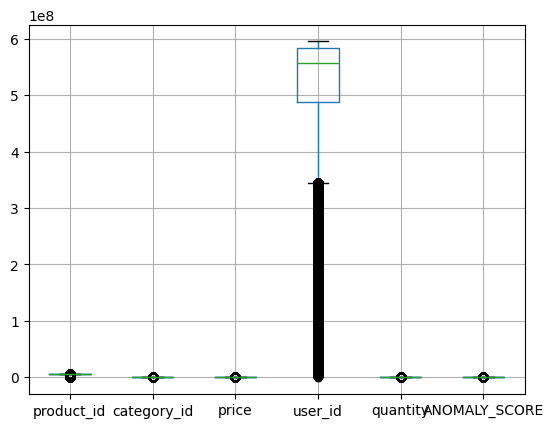

In [43]:
DATA_FOR_logTRANSFORMATION.boxplot()

In [44]:
DATA_FOR_boxcoxTRANSFORMATION=DATA.copy()

In [45]:
from scipy.stats import boxcox
# Apply Box-Cox
DATA_FOR_boxcoxTRANSFORMATION['category_id'], lambda_val = boxcox(DATA_FOR_boxcoxTRANSFORMATION['category_id'])

<Axes: >

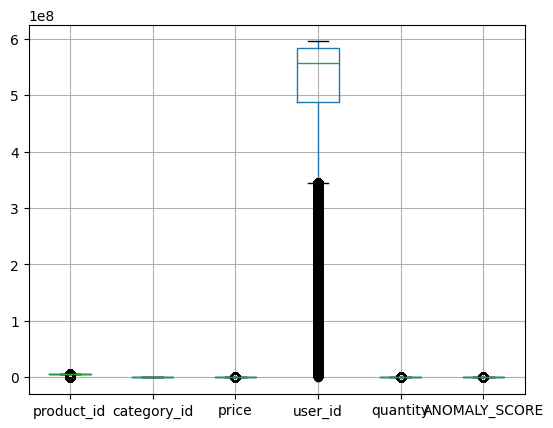

In [46]:
DATA_FOR_boxcoxTRANSFORMATION.boxplot()


---

## 🔹 **Univariate Outlier Treatment**

👉 Focuses on **one column at a time**

### ✅ Methods:

* **Z-Score** – Outliers beyond ±3 std dev
* **IQR** – Values outside Q1–1.5×IQR or Q3+1.5×IQR
* **Winsorization** – Cap extreme values
* **Transformation** – Log, Box-Cox, √ to reduce outlier impact
* **Imputation** – Replace outliers with mean/median

🧰 **Use when**: Features are **independent**

---

## 🔸 **Multivariate Outlier Treatment**

👉 Looks at **all columns together**

### ✅ Methods:

* **Isolation Forest** – Detects rows needing fewer splits
* **Elliptic Envelope** – Detects elliptical data outliers
* **One-Class SVM** – Learns normal boundary
* **dbscan** – Detects based on local density
* **Mahalanobis Distance** – Measures distance from multivariate mean

🧰 **Use when**: Features are **related**

---

🧠 **Key Difference**:

* **Univariate** = Detect column-wise 📈
* **Multivariate** = Detect row-wise 🔍
